* talk about homeworks (only Wednesday)
* check the feedback (GitHub)
* partial exam
* language thing...

# Monte Carlo...

John von Neumann, Manhattan project, Casino...

<table><tr>
<td> <img src="imgs/monte_carlo_wikipedia.png" width="1000" /> </td>
</tr></table>

https://en.wikipedia.org/wiki/Monte_Carlo_method

<table><tr>
<td> <img src="imgs/monaco_map.png" width="500" /> </td>
</tr></table>

<table><tr>
<td> <img src="imgs/monaco_monte_carlo.png" width="500" /> </td>
</tr></table>

<table><tr>
<td> <img src="imgs/casino_outside.png" width="500" /> </td>
</tr></table>

<table><tr>
<td> <img src="imgs/casino.png" width="500" /> </td>
</tr></table>



### Monte Carlo Methods is not just one method, it is a family of methds
* those examples of methods are for you to have a collection of methods and techniques
* recall minimization
* advantages and disadvantages of MC methods

After this class you should know:
* difference between Riemann sum integral and Monte Carlo method
* say at least two methods of calculating integral using MC
* explain briefly how they work
* whats the disadvantage of Monte Carlo Method
* whats the advantage of Monte Carlo Method

MC methods all share the concept of using randomly drawn samples to compute a solution to a given problem. These problems generally come in two main categories:

* simulation: Monte Carlo or random sampling is used to run a simulation. If you want to compute the time it will take to go from point A to point B, given some conditions such as the chances that it will rain on your journey or that it will snow, the chances that there will be a traffic jam, that you will have to stop on your way to get some gas, etc. you can set these conditions at the start of your simulation and run the simulation 1,000 times to get an estimated time. As usual, the higher the number of runs or trials (here 1,000), the better your estimate.
    
* integration: contrary to the Riemann sum technique here the spacing between the segments is not necessarily the same. Here we will consider two ways of calculating integrals using MC methods: 
 1. Monte Carlo: Von Neumann aka acceptance-rejection method
 2. Monte Carlo: Mean value method = Expectation value

### Justification of the MC methods
Most numerical methods to calcualte integrals like trapezoid, Simpson (Riemann sum techniques) or quad are generally converging faster than MC methods. However as the dimension of the integrals increase, these methods often become computationally expensive where the Monte Carlo ones can still provide with reasonably good estimate at a fixed computational cost. For this reason, for complex integrals, MC methods are generally a better solution (despite their pretty bad convergence rate).

* basically in most applications one uses quad method from the scipy library its fast!
* Monte Carlo is good for complex multidimensional integrals 
  * its very simple
  * but its slow

 ## 1. Monte Carlo: Von Neumann aka acceptance-rejection method
 
Lets imagine a complicated integral 
<table><tr>
<td> <img src="imgs/complex_integral_MC.png" width="500" /> </td>
</tr></table>

How can we calculate it numerically using one MC method (Von Neumann aka acceptance-rejection method)
* we can randomly choose couple of numbers $(x_i,y_i)$ from the range of the domain of the function
* count the fraction of points where $y_i \leq f(x_i) $ with respect to the area of the known surface (in this case)

<table><tr>
<td> <img src="imgs/acceptance_rejection_complex_function.png" width="400" /> </td>
</tr></table>

## Example of using acceptance-rejection method to calculate $\pi$

Imagine, you want to calculate the area of a circle, but you didn’t know anything about $\pi$. Instead, you chose to surround the circle by a square, for which you do know how to calculate the area.

$$f(x) = \sqrt{1-x^2}$$

$$A_{circ} = \int_{-1}^{1} f(x) \ dx = \pi \frac{r^2}{2}$$

$$A_{rec} = \Delta_y \cdot \Delta_x$$

$$\frac{n}{N} \propto \frac{A_{circ}}{A_{rec}} = \frac{\pi r^2 / 2}{\Delta_y \cdot \Delta_x}$$

$$\pi \propto 4 \frac{n}{N} $$

<table><tr>
<td> <img src="imgs/acceptance_rejection_pi.png" width="400" /> </td>
</tr></table>

## Realization of the acceptance-rejection method to calculate $\pi$

<table><tr>
<td> <img src="imgs/circ1.png" width="200" /> </td>
</tr></table>

Now, we throw darts at the paper and we take a tally of total number of darts that were thrown as well as the darts that land inside the circle.

*the key here is the randomness!!!

<table><tr>
<td> <img src="imgs/circ2.png" width="200" /> </td>
<td> <img src="imgs/circ3.png" width="200" /> </td>
<td> <img src="imgs/circ5.png" width="200" /> </td>
</tr></table>



* we throw one time: $\ $  $\rightarrow$ inside the circe 01, total 01
* we throw three times: $\rightarrow$ inside the circe 02, total 03
* we throw fifty times: $\rightarrow$ inside the circe 40, total 50



So, 40 out of 50 darts are inside the circle, or in other words: $80 \%$. 

So, assuming the darts were thrown randomly, I could approximate the area of the circle by $A_c\approx 0.8 A_s$.

As we make square 2x2 then the radius is 1 and the area will be exactly $A_c=\pi$ 

If the square has an area of 4 units, then
$ A_c= 4.0 * 0.8 = \color{red}{\text{3.2}}  \approx \pi r^2 = 3.1415$

*but we threw only 50 times! What happens if we throw million times?




In [1]:
import math, random
import numpy as np
 
def isPointInCircle(x, y, Cx, Cy, radius):
    return math.sqrt((x - Cx)**2 + (y - Cy)**2) <= radius
 
def approximateCircleArea(radius, numberOfPoints):
    squareSide = radius*2
    Cx = radius
    Cy = radius
 
    pointsInside = 0
    for i in range(numberOfPoints):
        x = random.random()*squareSide
        y = random.random()*squareSide
 
        if (isPointInCircle(x, y, Cx, Cy, radius)):
            pointsInside = pointsInside + 1
 
    return pointsInside / numberOfPoints * squareSide**2

In [2]:
pimc=approximateCircleArea(1.0,1000000)
print('Monte Carlo pi: ', format(pimc, ".5f"))
print('Numpy pi      : ', format(np.pi, ".5f"))

print('error:', format(abs((np.pi-pimc)/np.pi)*100, "2.2") ,'%')

Monte Carlo pi:  3.14369
Numpy pi      :  3.14159
error: 0.067 %


## 2. Monte Carlo: Expectation (mean) value method

Lets assume that we remember statistics.... 

And from the statistics we know that the expectation value is (numerically is a mean or average value):

$$E(X) = \frac{1}{b-a} \int_{a}^{b} f(x) \ dx $$

$$(b-a) E(X) =  \int_{a}^{b} f(x) \ dx $$

expectation value is basically a mean value (average)

$$ E(X) = \frac{1}{N} \sum_i f(x_i)$$

$$(b-a) \frac{1}{N} \sum_i f(x_i) \approx  \int_{a}^{b} f(x) \ dx $$

$$I \approx (b-a) \frac{1}{N}\sum_{i=1}^{N} f(x_i)$$

This implies that we can find an approximation of an interval by calculating the average value times the range that we integrate.

In other word multiply the mean by the range only!!

*comment: this should look familiar as $\frac{(b-a)}{N} = \Delta_x$

### Derivation of the EXPECTATION VALUE: $E(X)$ 

Definition from a book on statistics:

$$E(X) = \int f(X) P(X) \ dX $$

where P(X) is the PDF Probability Density Function of the variable X

<table><tr>
<td> <img src="imgs/pdf_normal.png" width="400" /> </td>
</tr></table>

Thats why:

$$E(X) = \frac{1}{b-a} \int_{a}^{b} f(x) \ dx $$


<table><tr>
<td> <img src="imgs/uniform_vs_normal_distribution.png" width="400" /> </td>
</tr></table>

And you can already see that this first: "flat" distribution is the uniform distribution that it is need for the calculation

We want uniformly distributed $x_i$ becase we want to "probe" the function as with equal probability.

### Easy remembering forms:

$$ \int_{a}^{b} f(x) \ dx  \approx mean_{f(x)} (b-a) $$

$$ \int_{a}^{b} \int_{c}^{d} f(x,y) \ dx \ dy \approx mean_{f(x,y)} (b-a)(d-c) $$

$$ \int_{a}^{b} \int_{c}^{d} \int_{e}^{f} f(x,y,z) \ dx \ dy \ dz \approx mean_{f(x,y,z)} (f-e)(d-c)(b-a) $$

*soon it will be clear the power of Monte Carlo Method!

### Example 1

$$ \int_{5}^{20} \frac{x}{(x+1)^3} \ dx$$

$$ \int_{5}^{20} \frac{x}{(x+1)^3} \ dx \approx (b-a) \frac{1}{N}\sum_{i=1}^{N} \frac{x_i}{(x_i+1)^3} = mean_{f(x)} (b-a) $$
where $x_i$ is the random number from the set of uniformly distributed random numbers
(the more the better)

Recipe:

* Declare the variables
  * a=5; b=20; N=1000
  
  
* generate uniformly distributed numbers from a to b (from 5 to 20)
  * x=np.random.uniform(a,b,N)
  * x_i = np.random.uniform(a,b)
  
  
* evaluate the function at those points
  * def integrand(x): return x/(1+x)**3
  * y=integrand(x)
  
  
* calculate the mean of the function 
  * mean_y=np.mean(y)
  
  
* multiply the mean by (b-a)
  * mean_y*(b-a)

In [3]:
import numpy as np
import scipy.integrate as integrate

E=0
N = 100000
a = 5.0
b = 20.0

for i in range(N):
    x = np.random.uniform(a,b)
    E=E + x/((1+x)**3)
    
E=E/N    
print(E*(b-a))


0.10652020625662648


or

In [4]:
# vectorize the above
import numpy as np

N = 1000000
a = 5.0
b = 20.0
x = np.random.uniform(a,b,N)
y = x/((1+x)**3)
print(np.mean(y)*(b-a))

# or more elegantly
def integrand(x):
    return x/((1+x)**3)
print(np.mean(integrand(x))*(b-a))


0.10627705729964494
0.10627705729964494


(array([  2.,   3.,  26., 127., 227., 283., 211.,  89.,  30.,   2.]),
 array([0.07723882, 0.0826281 , 0.08801738, 0.09340666, 0.09879595,
        0.10418523, 0.10957451, 0.11496379, 0.12035308, 0.12574236,
        0.13113164]),
 <a list of 10 Patch objects>)

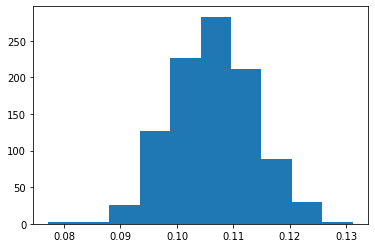

In [5]:
import matplotlib.pyplot as plt
def integrand(x):
    return x/((1+x)**3)

Is=[]
for i in range(1000):
    x = np.random.uniform(5,20,100)
    I=0
    I=np.mean(integrand(x))*(b-a)
#    print(I)
    Is.append(I)
#print(Is)    
plt.hist(Is)

### Compare with scipy QUAD

In [6]:
# using quad
import scipy.integrate as integrate
I,error=integrate.quad(integrand,5,20)
print(I)

0.10629251700680273


double check:

https://www.wolframalpha.com

### Intuitive explanation:
But after all this still sounds quite strange.
Why the integral is just mean value of the function multiplied by range??

<table><tr>
<td> <img src="imgs/area_mean_range2.png" width="400" /> </td>
</tr></table>

That sounds unbelievable becase the function can have many shapes so how come?


Because of the statistics, which works only if its really random :

<table><tr>
<td> <img src="imgs/area_mean_range3.png" width="800" /> </td>
</tr></table>


## Homework 

Calculate the following integral:

$\int_{0}^{4} \sqrt[4]{15 x^3 + 21x^2 + 41x + 3} \cdot e^{-0.5x} dx$

using Monte Carlo Mean Value method

then plot the value of the integral vs number of iterations (check the convergence):

N=[10,100,1000,10000,100000,1000000]

and on the same graph plot the value of the integral using scipy quad method 

*the scipy quad will give a constant horizontal line while MC should show some oscillations

## Extra - multiple integral 

Lets imagine an integral:
$$ \int_{\pi}^{2 \pi} \int_{0}^{\pi} y sin(x) + x cos(y) \ dy \ dx $$

### Scipy is faster but requires some skills to program the function...
* to appreciate the Monte Carlo Method lets try to do it using scipy quad:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.nquad.html

In [7]:
import numpy as np
from scipy import integrate
def f(*args):
    x, y = args
    return y * np.sin(x) + x * np.cos(y)

I,error=integrate.nquad(f,[[np.pi,2*np.pi],[0,np.pi]])
print(I)
# it's a trick. It works but requires some documentation study...

-9.869604401089354


### But Monte carlo method is still simple

$$ \int_{a}^{b} \int_{c}^{d} f(x,y) \ dx \ dy \approx mean_{f(x,y)} (b-a)(d-c) $$
$$ \int_{\pi}^{2 \pi} \int_{0}^{\pi} y sin(x) + x cos(y) \ dy \ dx $$

In [8]:
E=0
N=100000

a=np.pi
b=2*np.pi
c=0
d=np.pi

for i in range(N):
    x = np.random.uniform(a,b)
    y = np.random.uniform(c,d)
    E = E + y * np.sin(x) + x * np.cos(y)
E=E/N        
print(E*(b-a)*(d-c))

-10.022433536316854


## Another example (from the partial exam):


Resolver la integral usando el método de Monte Carlo

$$I = \int_0^{\pi/2} \int_0^{1} cos(x) \ exp(y) \ dy \ dx$$


In [44]:
import numpy as np
N=100000
E=0.0
#N=1000
a=0.0
b=0.5*np.pi
c=0.0
d=1.0

for i in range(N):
    x = np.random.uniform(a,b)
    y = np.random.uniform(c,d)
    E = E +  np.cos(x) * np.exp(y)
E=E/N      
I=E*(b-a)*(d-c)
print('I_MC=',I)
print('I_exact=',np.e-1)

I_MC= 1.7210802630506248
I_exact= 1.718281828459045


* one can also do this in a loop 1000 times and pick the mean value!!!! 

In [27]:
import numpy as np
def montecf(N):
    E=0.0
    a=0.0
    b=0.5*np.pi
    c=0.0
    d=1.0

    for i in range(N):
        x = np.random.uniform(a,b)
        y = np.random.uniform(c,d)
        E = E +  np.cos(x) * np.exp(y)
    E=E/N      
    I=E*(b-a)*(d-c)
    return I

I_MC= 1.7194152062040862
I_exact= 1.718281828459045


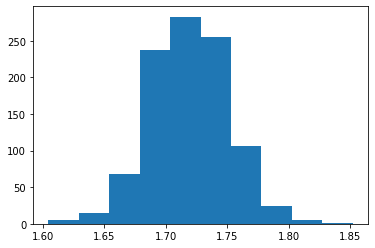

In [45]:
import matplotlib.pyplot as plt
Is=[]
for i in range(1000):
    I=0.0
    I=montecf(1000)
#    print(I)
    Is.append(I)
#print(Is)    

bins=10
plt.hist(Is,bins)
Imean=np.mean(Is)
print('I_MC=',Imean)
print('I_exact=',np.e-1)

### Questions
* difference between Riemann sum integral and Monte Carlo method
* say at least two methods of calculating integral using MC
* explain briefly how they work
* when can you use quad, simpsons, trapezoid methods and when MC method